In [2]:
# function transformer in skitlearn allows you to appply custom transformation to your
# data in a pipleine freindly way . instead of writing manual data transformation steps,
# yu can encasulate them into a functiontransformer and seamlessely 
# integrate them into machine leanring pipelines

In [39]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("loan.csv")

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\shant\AppData\Local\Temp\ipykernel_676\3637603024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

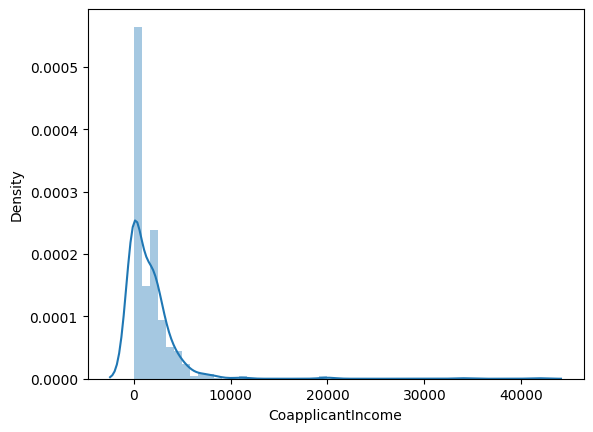

In [19]:
sns.distplot(df["CoapplicantIncome"])

In [20]:
# as you can see the long tail hence there are outliers present in the data

In [15]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)

min_r = q1 - 1.5 * (q3 - q1)
max_r = q3 + 1.5 * (q3 - q1)
min_r , max_r

(np.float64(-3445.875), np.float64(5743.125))

In [35]:
 df = df[df['CoapplicantIncome'] <= max_r]
# hence here outliers are removed 

C:\Users\shant\AppData\Local\Temp\ipykernel_676\2149142820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

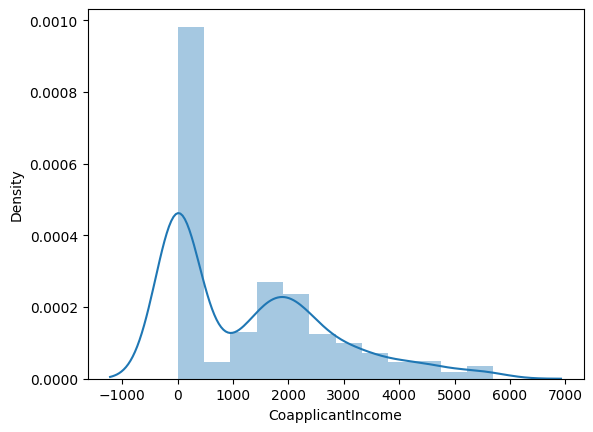

In [36]:
sns.distplot(df['CoapplicantIncome'])

In [37]:
# we have to convert this into normal distribution 
# so we have to use function transfromer

In [40]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(func=np.log1p)  # log1p will never give you value 0 , (arithmetic error)

In [41]:
ft.fit(df[['CoapplicantIncome']] )

FunctionTransformer(func=<ufunc 'log1p'>)

In [45]:
df['CoapplicantIncome_ft'] = ft.transform(df[['CoapplicantIncome']] )

C:\Users\shant\AppData\Local\Temp\ipykernel_676\2890490176.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\shant\AppData\Local\Temp\ipykernel_676\2890490176.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_ft'])


Text(0.5, 1.0, 'after')

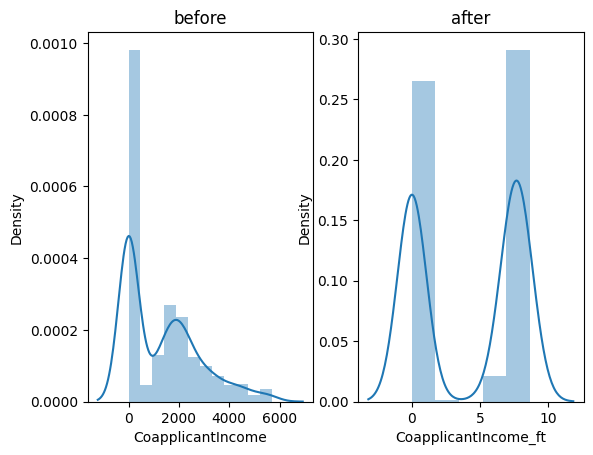

In [48]:
plt.subplot(1,2,1)
sns.distplot(df['CoapplicantIncome'])
plt.title("before")
plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome_ft'])
plt.title("after")